# Projetinho 1. Análise e Limpeza de Dados

## Importando o dataset e as bibliotecas que serão úteis para o projeto:

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('df_athlete_events.csv')

## Entendendo o dataset

O primeiro passo para começar a análise de dados é usar alguns métodos que fornecem informações básicas sobre o dataset e cada uma de suas colunas.

In [58]:
# 5 primeiras linhas
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [59]:
# 5 últimas linhas
df.tail()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
45562,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
45563,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
45564,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
45565,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
45566,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [60]:
# informações adicionais sobre cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


## Limpeza e manipulação dos dados

### Algumas observações iniciais

Através das informações iniciais adquiridas do dataset, foi possível perceber algumas coisas:

- As colunas 'Age', 'Height', 'Weight', 'Medal' apresentam dados faltantes!
- A feature 'Weight' deveria ser um dado numérico, mas está como categórico.

In [61]:
# Vamos entender o que está acontecendo em Weight
df.Weight.unique()

array([nan, '75.0', '85.0', '64.0', '72.0', '90.0', '87.0', '49.0',
       'hsuahusahu', '76.0', '83.0', '86.0', '82.0', '55.0', '67.0',
       '60.0', '79.0', '96.0', '97.0', '70.0', '88.0', '56.0', '80.0',
       '59.0', '91.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0',
       '125.0', '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0',
       '92.0', '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0',
       '81.0', '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0',
       '120.0', '74.0', '110.0', '100.0', '66.0', '47.0', '116.0',
       '107.0', '53.0', '45.0', '105.0', '109.0', '156.0', '71.0', '98.0',
       '160.0', '106.0', '146.0', '44.0', '138.0', '141.0', '94.0',
       '118.0', '101.0', '39.0', '32.0', '112.0', '115.0', '74.5',
       '121.0', '135.0', '111.0', '43.0', '36.0', '67.5', '114.0',
       '132.0', '65.5', '42.0', '59.5', '127.5', '108.0', '35.0', '117.0',
       '103.0', '58.5', '214.0', '113.0', '146.5', '116.5', '140.0',
       '38.0', '

Vamos usar o método .to_numeric do pandas para converter os dados de object para float64 e, ao mesmo tempo, transformar as risadas sarcásticas em valores inválidos NaN.

In [62]:
df['Weight'] = pd.to_numeric(df['Weight'], errors = 'coerce')

# Conferindo se ainda há risadas
df.loc[df['Weight'] == 'hsuahusahu']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [63]:
# Conferindo o novo tipo da coluna
df.dtypes['Weight']

dtype('float64')

Tudo certo! Agora que todas as colunas estão com os tipos de dados certos, podemos começar a limpeza dos dados.

### Dados categóricos

Usando o método .describe() para as colunas categóricas podemos ver informações sobre cada uma delas.

In [64]:
df.describe(include = ['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,5515,5957,2321,38607,4091,4811,1379,13320


#### A partir daí, podemos chegar a algumas observações:
- 6 categorias em 'Sex', quando só deveria haver duas;
- 'Team' e 'NOC' deveriam ter a mesma quantidade de valores únicos;
- As Olimpíadas só acontecem no inverno ou verão, então as 5 categorias em 'Season' não fazem sentido;
- Também há exagero nas opções de medalhas, que deveriam ser 3;
- 'Medal' tem dados faltantes.

Vamos, então, analisar e resolver cada um dos pontos levantados.

#### Coluna 'Sex'

Ajeitando os dados na coluna 'Sex', para caberem todos em 'M' (male/masculino) ou 'F' (female/feminino):

In [65]:
# Descobrir quais são as 6 categorias atuais em 'Sex'
df.Sex.unique()

array(['M', 'MALE', 'FEMALE', 'F', 'Vic vai te dar um socao',
       'P&D >> Comunidade'], dtype=object)

Vamos tentar descobrir se há um padrão para 'Vic vai te dar um socao' e 'P&D >> Comunidade', para decidir se é melhor excluir ou substituir esses dados.

In [66]:
df.loc[df['Sex'] == 'P&D >> Comunidade']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
365,1467,Mara Magdalena Aicega Amicarelli,P&D >> Comunidade,34.0,165.0,60.0,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Bronze
399,1546,Eirini Andili,P&D >> Comunidade,17.0,167.0,45.0,Greece,GRE,2000 Summer,2000,Summer,Sydney,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Bronze
432,1639,Albina Khamitovna Akhatova,P&D >> Comunidade,29.0,160.0,55.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Women's 4 x 6 kilometres Relay,Gold
496,2210,Marina Alabau Neira,P&D >> Comunidade,26.0,164.0,55.0,Spain,ESP,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Windsurfer,Gold
552,2464,Jo Qesem Ayela Aleh,P&D >> Comunidade,30.0,171.0,58.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's Two Person Dinghy,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,133635,"Claudia Hildegard Zaczkiewicz (Reidick-, -Reid...",P&D >> Comunidade,26.0,170.0,57.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres Hurdles,Bronze
45021,134077,Nataliya Borisovna Zasulskaya,P&D >> Comunidade,23.0,190.0,95.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
45103,134294,Martina Zellner (-Seidl),P&D >> Comunidade,23.0,169.0,62.0,Germany,GER,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,Gold
45187,134531,Zhang Ping,P&D >> Comunidade,22.0,187.0,73.0,China,CHN,2004 Summer,2004,Summer,Athina,Volleyball,Volleyball Women's Volleyball,Gold


In [67]:
df.loc[df['Sex'] == 'Vic vai te dar um socao']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
21,30,Pepijn Aardewijn,Vic vai te dar um socao,26.0,189.0,72.0,Netherlands,NED,1996 Summer,-765,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
131,562,Pawe Abratkiewicz,Vic vai te dar um socao,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Men's 500 metres,NaN
227,963,Derrick Ralph Adkins,Vic vai te dar um socao,26.0,188.0,80.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold
355,1435,Janne Petteri Ahonen,Vic vai te dar um socao,28.0,184.0,66.0,Finland,FIN,2006 Winter,2006,Winter,Torino,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
404,1555,Geard Ajetovi,Vic vai te dar um socao,19.0,170.0,67.0,Serbia and Montenegro,SCG,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44407,132195,Yury Aleksandrovich Yakimov,Vic vai te dar um socao,23.0,186.0,80.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Men's Quadruple Sculls,Silver
44542,132638,Dmitry Semyonovich Yaparov,Vic vai te dar um socao,28.0,186.0,86.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,Silver
44739,133136,Yoshikatsu Yoshida,Vic vai te dar um socao,22.0,161.0,56.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Flyweight, Freestyle",Gold
44842,133512,Denys Serhiyovych Yurchenko,Vic vai te dar um socao,30.0,175.0,75.0,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Pole Vault,Bronze


Há 333 linhas com 'P&D >> Comunidade' definido como sexo e 312 linhas definidas como 'Vic vai te dar um socao'. Isso representa uma porcentagem muito pequena do dataset total e, provavelmente, não faria falta se fosse retirado. Porém, olhando para a modalidade competida na feature 'Event', parece que 'P&D >> Comunidade' foi atribuído a modalidades femininas e 'Vic vai te dar um socao' a modalidades masculinas. Vamos conferir se essa impressão pode ser confirmada verdadeira para então, finalmente, substituir os valores.

In [68]:
df_parcial = df.loc[df['Sex'] == 'P&D >> Comunidade']
# conta quantas linhas que possuem P&D >> Comunidade como Sex também tem a string 'Women' contida na descrição da modalidade disputada
df_parcial['Event'].str.contains('Women').sum()

322

In [69]:
df_parcial = df.loc[df['Sex'] == 'Vic vai te dar um socao']
# conta quantas linhas que possuem 'Vic vai te dar um socao' como Sex também tem a string 'Men' contida na descrição da modalidade disputada
df_parcial['Event'].str.contains('Men').sum()

288

Das 333 linhas com 'P&D >> Comunidade', somente 11 não estão associadas ao sexo feminino. Da mesma forma, 288 dos 312 dados com 'Vic vai te dar um socao', são ligados ao sexo masculino. Assim, como o índice de erro será muito baixo dentro de um DataFrame com 45567 entradas, vamos generalizar e fazer as substituições devidas: 

In [70]:
# Substituindo 'MALE' e 'Vic vai te dar um socao' por 'M'
df['Sex'].replace("MALE", "M", inplace = True)
df['Sex'].replace('Vic vai te dar um socao', 'M', inplace = True)

# Substituindo 'FEMALE' e 'P&D >> Comunidade' por 'F'
df.Sex.replace('FEMALE', 'F', inplace = True)
df.Sex.replace('P&D >> Comunidade', 'F', inplace = True)

# Conferindo as alterações
df.Sex.unique()

array(['M', 'F'], dtype=object)

Pronto! A coluna 'Sex' está devidamente organizada em somente 2 categorias: 'M' para masculino e 'F' para feminino.

#### Colunas 'Team' e 'NOC'

A partir de uma rápida observação do arquivo .csv que está sendo utilizado, é possível perceber que a coluna 'Team' não está bem organizada. Ela deveria ter 201 categorias, pois cada comitê olímpico nacional (NOC) representa um time, mas foi apresentada com 602 diferentes classificações, entre elas nomes de clubes, campeonatos, nomes dos próprios países numerados, '#Forabolsonaro', entre outros. Por isso, como já possuímos a coluna 'NOC', que nos dá as mesmas informações e está bem mais clara, em vez de limpar/substituir os dados estranhos, vamos tomar a decisão de simplesmente dispensar a feature 'Team'.

In [71]:
# Imprime o dataframe atualizado, sem a coluna 'Team'
df.drop(columns = 'Team', inplace = True)
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


#### Coluna 'Season'

Vamos ver o que está acontecendo com essa coluna e quais são as 5 categorias que aparecem nela.

In [72]:
df.Season.unique()

array(['Summer', 'Winter', '#ForaBolsonaro', 'Ele nunca', 'Ele não'],
      dtype=object)

Apesar de concordar com as mensagens de protesto contra o presidente, esses dados podem nos atrapalhar futuramente e é importante decidir se o melhor a fazer é apagá-los ou substituí-los. Vamos procurar qual é a frequência deles no dataset

In [73]:
df['Season'].value_counts()

Summer            38607
Winter             6808
#ForaBolsonaro       72
Ele não              50
Ele nunca            30
Name: Season, dtype: int64

Se pensarmos bem, é possível descobrir o real valor desses dados ao olharmos para a coluna 'Games', que engloba tanto o ano quanto a estação em que os Jogos ocorreram, sendo viável tirar informações a partir daí. Porém, os valores inválidos estão só em 152 dados, o que representa menos de 0,4% do dataset. Por isso, nesse caso, é possível e justificável simplesmente apagar essas linhas.

In [74]:
# Seleciona os valores que queremos retirar da coluna
invalidos = df.Season.isin(['#ForaBolsonaro', 'Ele não', 'Ele nunca'])

# Guarda os índices das linhas desses inválidos em uma nova variável
indexSeasonDrop = df[invalidos].index

# Apaga as linhas com tais índices
df.drop(indexSeasonDrop, inplace = True)

# Confere se foram retiradas
df.Season.value_counts()


Summer    38607
Winter     6808
Name: Season, dtype: int64

Percebemos, então, que as linhas que continham os valores de 'Season' indesejados já foram retiradas do DataFrame.

#### Coluna 'Medal'

Nessa coluna, temos inicialmente dois principais problemas a serem resolvidos: a quantidade extrapolada de categorias e os dados faltantes. Vamos lidar com um de cada vez, primeiro descobrindo quais são os 4 valores que estão sendo considerados e qual é a frequência de cada um.

In [75]:
df.Medal.unique()

array(['Gold', nan, 'Bronze', 'Silver', 'Nelson'], dtype=object)

In [76]:
df.Medal.value_counts()

Gold      13276
Bronze    13208
Silver    13024
Nelson      165
Name: Medal, dtype: int64

In [77]:
# Conta a quantidade de valores inválidos NaN na coluna de medalhas
df['Medal'].isna().sum()

5742

Podemos concluir, então, que há 5742 valores inválidos, o que já representa 12% do dataset inicial e não é uma quantidade insignificante a ponto de ser ignorada. Os valores NaN representam atletas que não receberam nenhuma medalha e essa informação deve ser mantida, pois pode ser útil para futuras análises.

Já as medalhas Nelson, por sua vez, poderiam sim ser descartadas, por representarem menos de 0,4% do total de dados. Nesse caso, como as quantidades de medalhas de bronze, prata e ouro estão equilibradas, o que já era esperado, vamos optar por transformar as medalhas 'Nelson' e os dados NaN em uma nova categoria 'No medal', tratando esses dados como atletas que competiram sem chegar ao pódio, assim mantendo as proporções dos dados iniciais. Para isso, usaremos os métodos .replace() e .fillna()

In [78]:
# Substitui medalhas 'Nelson' por 'No medal'
df['Medal'].replace('Nelson', 'No medal', inplace = True)

# Substitui valores NaN por 'No medal'
df['Medal'].fillna('No medal', inplace = True)

# Confere se as alterações foram feitas como esperávamos
df.Medal.value_counts()

Gold        13276
Bronze      13208
Silver      13024
No medal     5907
Name: Medal, dtype: int64

Os valores 'Nelson' e NaN foram substituídos com sucesso! O problema dos dados faltantes também foi resolvido, pois percebemos que eles têm um significado prático em nossa análise. Nossa coluna de medalhas agora está pronta para a continuidade do projeto.

#### Outras colunas

Agora que todas as observações iniciais foram trabalhadas mais a fundo e resolvidas individualmente, vamo tentar extrair informações das colunas que não foram mexidas, para ter certeza de que não há nenhum problema particular a respeito delas.

In [79]:
df.NOC.unique()

array(['DEN', 'USA', 'FIN', 'NOR', 'NED', 'FRA', 'ITA', 'ESP', 'AZE',
       'RUS', 'ARG', 'BLR', 'CMR', 'HUN', 'GRE', 'AUS', 'EGY', 'IRI',
       'CAN', 'PAK', 'URS', 'UZB', 'TJK', 'EUN', 'JPN', 'ETH', 'SUI',
       'GDR', 'GER', 'MON', 'SWE', 'RSA', 'TUR', 'BUL', 'GBR', 'POL',
       'DJI', 'JOR', 'ROU', 'CUB', 'PUR', 'VEN', 'MEX', 'GHA', 'MAR',
       'NZL', 'URU', 'TCH', 'NGR', 'KEN', 'BRA', 'AUT', 'LTU', 'BEL',
       'FRG', 'BEN', 'PAN', 'ESA', 'INA', 'MAS', 'KOR', 'CHI', 'MTN',
       'UKR', 'SCG', 'UGA', 'IRQ', 'SYR', 'QAT', 'KUW', 'OMA', 'PLE',
       'IOA', 'KSA', 'UAE', 'CRO', 'COL', 'ARM', 'SRB', 'ISL', 'NIG',
       'ISV', 'PNG', 'SUD', 'IND', 'BIH', 'ALG', 'JAM', 'TTO', 'CIV',
       'PHI', 'LUX', 'POR', 'BOT', 'ROT', 'TUN', 'PRK', 'CHN', 'YUG',
       'MAD', 'GUY', 'KAZ', 'ISR', 'IRL', 'IVB', 'DOM', 'GEO', 'EST',
       'HAI', 'CZE', 'AFG', 'SVK', 'SAA', 'PAR', 'BAH', 'ANZ', 'MNE',
       'GUA', 'AND', 'ANG', 'SLO', 'TAN', 'BER', 'LIB', 'MRI', 'ALB',
       'KGZ', 'BAR',

Todos os valores estão dentro do padrão de código de 3 dígitos e representam um comitê olímpico nacional, ou seja, não há nenhum problema aparente a ser tratado.

In [80]:
df.Games.unique()

array(['1900 Summer', '1992 Winter', '1920 Summer', '2014 Winter',
       '1948 Summer', '1952 Summer', '1994 Winter', '2002 Winter',
       '2006 Winter', '2008 Summer', '1988 Summer', '1996 Summer',
       '1952 Winter', '1960 Winter', '1912 Summer', '1956 Summer',
       '2016 Summer', '2000 Summer', '2012 Summer', '2004 Summer',
       '1980 Summer', '1984 Summer', '1992 Summer', '1936 Summer',
       '1906 Summer', '1964 Summer', '1960 Summer', '1972 Summer',
       '1924 Summer', '1924 Winter', '1904 Summer', '1932 Summer',
       '1928 Winter', '1998 Winter', '1988 Winter', '1968 Winter',
       '1976 Summer', '2010 Winter', '1908 Summer', '1928 Summer',
       '1968 Summer', '1972 Winter', '1980 Winter', '1984 Winter',
       '1936 Winter', '1956 Winter', '1976 Winter', '1964 Winter',
       '1948 Winter', '1932 Winter', '1896 Summer'], dtype=object)

A coluna de Games também está bem adequada ao seu padrão; tudo ok!

In [81]:
df.Sport.unique()

array(['Tug-Of-War', 'Cross Country Skiing', 'Swimming', 'Ice Hockey',
       'Gymnastics', 'Alpine Skiing', 'Handball', 'Hockey', 'Rowing',
       'Football', 'Speed Skating', 'Sailing', 'Cycling', 'Fencing',
       'Taekwondo', 'Athletics', 'Canoeing', 'Water Polo', 'Wrestling',
       'Modern Pentathlon', 'Figure Skating', 'Golf', 'Softball',
       'Volleyball', 'Boxing', 'Basketball', 'Nordic Combined',
       'Baseball', 'Diving', 'Shooting', 'Freestyle Skiing', 'Bobsleigh',
       'Equestrianism', 'Curling', 'Judo', 'Tennis', 'Badminton',
       'Rugby Sevens', 'Rhythmic Gymnastics', 'Weightlifting',
       'Beach Volleyball', 'Ski Jumping', 'Rugby',
       'Short Track Speed Skating', 'Archery', 'Biathlon', 'Lacrosse',
       'Synchronized Swimming', 'Triathlon', 'Polo', 'Luge',
       'Table Tennis', 'Art Competitions', 'Snowboarding', 'Cricket',
       'Skeleton', 'Racquets', 'Military Ski Patrol', 'Croquet', 'Roque',
       'Alpinism', 'Trampolining', 'Basque Pelota', 'Motor

Os valores únicos da coluna 'Sport' também são todos válidos e já estão sendo bem utilizados.

In [82]:
df.Event.unique

<bound method Series.unique of 0                              Tug-Of-War Men's Tug-Of-War
1        Cross Country Skiing Men's 10/15 kilometres Pu...
2                   Swimming Men's 200 metres Breaststroke
3                   Swimming Men's 400 metres Breaststroke
4                              Ice Hockey Men's Ice Hockey
                               ...                        
45562                           Athletics Women's Shot Put
45563                           Athletics Women's Shot Put
45564                             Fencing Men's Foil, Team
45565               Athletics Women's 4 x 400 metres Relay
45566               Athletics Women's 4 x 400 metres Relay
Name: Event, Length: 45415, dtype: object>

Os eventos apresentam nomes bem mais detalhados sobre cada categoria de competição, e, por isso, não é possível visualizar todos os 760 valores únicos de uma só vez. Porém, através de um olhar geral, podemos considerar que está tudo em ordem com essa coluna do dataframe.

In [83]:
df.City.unique()

array(['Paris', 'Albertville', 'Antwerpen', 'Sochi', 'London', 'Helsinki',
       'Lillehammer', 'Salt Lake City', 'Torino', 'Beijing', 'Seoul',
       'Atlanta', 'Oslo', 'Squaw Valley', 'Stockholm', 'Melbourne',
       'Rio de Janeiro', 'Sydney', 'Athina', 'Moskva', 'Los Angeles',
       'Barcelona', 'Berlin', 'Tokyo', 'Roma', 'Munich', 'Chamonix',
       'St. Louis', 'Sankt Moritz', 'Nagano', 'Calgary', 'Grenoble',
       'Montreal', 'Vancouver', 'Amsterdam', 'Mexico City', 'Sapporo',
       'Lake Placid', 'Sarajevo', 'Garmisch-Partenkirchen',
       "Cortina d'Ampezzo", 'Innsbruck', '######'], dtype=object)

Opa! ###### não é um nome válido de cidade sede dos Jogos Olímpicos! Precisamos arrumar essa parte. Vamos contar a frequência desse erro e avaliar o quanto ele é realmente importante para a integridade do dataset.

In [84]:
len(df[df['City'] == '######'])

132

Verificamos que somente 132 dados, dentro de um universo de 45567, são inválidos para a cidade. Como estamos tratando de Olimpíadas, as cidades se repetem várias vezes no dataframe, e sempre associadas à mesma edição dos Jogos. Portanto, seria possível realizar uma função que buscasse, em outras linhas do dataset, a resposta para a cidade adequada e, a partir daí, seria possível substituir '######' pela cidade correta. Porém, trata-se de 0,3% dos dados totais, então esse é um esforço não necessário para que a análise possa ser continuada. Vamos, então, optar por excluir esses dados do nosso DataFrame.

In [85]:
# Armazena os índices das linhas que têm os dados inválidos e depois as apaga
indexHashtag = df[df.City == '######'].index
df.drop(indexHashtag, inplace=True)

# Conferindo a alteração
df.City.unique()

array(['Paris', 'Albertville', 'Antwerpen', 'Sochi', 'London', 'Helsinki',
       'Lillehammer', 'Salt Lake City', 'Torino', 'Beijing', 'Seoul',
       'Atlanta', 'Oslo', 'Squaw Valley', 'Stockholm', 'Melbourne',
       'Rio de Janeiro', 'Sydney', 'Athina', 'Moskva', 'Los Angeles',
       'Barcelona', 'Berlin', 'Tokyo', 'Roma', 'Munich', 'Chamonix',
       'St. Louis', 'Sankt Moritz', 'Nagano', 'Calgary', 'Grenoble',
       'Montreal', 'Vancouver', 'Amsterdam', 'Mexico City', 'Sapporo',
       'Lake Placid', 'Sarajevo', 'Garmisch-Partenkirchen',
       "Cortina d'Ampezzo", 'Innsbruck'], dtype=object)

As cidades que estavam como '######' foram retiradas com sucesso! =)

#### Revendo as modificações

Vamos utilizar mais uma vez o método .describe() para ter uma visão geral sobre os dados categóricos atualizados e verificar se as mudanças foram realizadas da forma correta

In [86]:
df.describe(include = ['object'])

,Name,Sex,NOC,Games,Season,City,Sport,Event,Medal
count,45283,45283,45283,45283,45283,45283,45283,45283,45283
unique,32757,2,201,51,2,42,66,760,4
top,"Michael Fred Phelps, II",M,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,32741,5917,2294,38497,4075,4780,1379,13237


Agora fica fácil perceber que temos a quantidade de categorias adequadas para cada coluna. Além disso, é perceptível que o dataframe foi reduzido e, no total, apagamos cerca de 0,6% do dataset original, o que não trará problemas para as análises.

### Dados numéricos

Agora que os dados categóricos estão limpos, vamos checar a integridade e validade dos dados numéricos.

In [87]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45283.000000,44310.000000,3.529100e+04,34186.000000,45283.000000
mean,69110.340923,25.858091,9.788161e+02,73.554418,1972.264846
std,38877.907271,5.963788,3.459253e+04,14.979302,94.465413
min,4.000000,10.000000,1.320000e+02,28.000000,-2992.000000
25%,36079.000000,22.000000,1.700000e+02,63.000000,1952.000000
50%,68610.000000,25.000000,1.780000e+02,72.750000,1984.000000
75%,103184.000000,29.000000,1.850000e+02,82.000000,2002.000000
max,135563.000000,73.000000,1.976779e+06,214.000000,2016.000000


#### Observações iniciais:
- A ID dos atletas não segue uma ordem numérica clara, pois o menor valor é 4 e o maior é 135563, bem acima do total de dados do dataframe.
- A altura máxima é de quase 20 mil metros, o que demonstra um erro no preenchimento dos dados. Provavelmente por causa desses erros, a média está acima de 9 metros.
- O valor mínimo da coluna 'Year' é negativo, o que não faz sentido.
- 'Age', 'Height', 'Weight' possuem dados faltantes.

#### Lidando com outliers

COLUNA 'HEIGHT'

Usaremos o método .distplot() disponibilizado pelo seaborn para ter uma ideia da distribuição das alturas dos atletas.

C:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

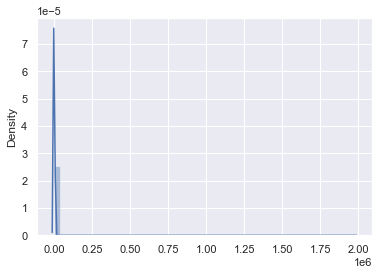

In [88]:
sns.set_theme(style="darkgrid")
sns.distplot(x = df['Height'])

É fácil perceber que os outliers estão distorcendo o gráfico e impedindo a visualização clara das alturas. Além disso, esses outliers estão representando valores impossíveis, pois nenhum ser humano tem sua altura na ordem de 10^6 centímetros. 

Vamos usar o método .len() para descobrir quantos são os outliers.

In [89]:
# Devolve a quantidade de alturas acima de 2,40 metros
len(df[df.Height > 240])

24

Por estarem em pouca quantidade, vamos usar o método .drop() para apagar esses outliers do dataframe.

C:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


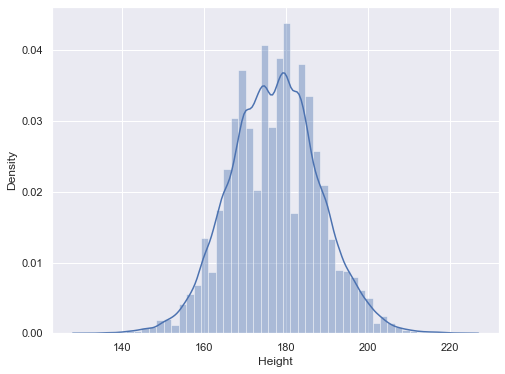

In [90]:
# Apaga os dados com altura acima de 2,40 metros
indexHeightDrop = df[df.Height > 240].index
df.drop(indexHeightDrop, inplace = True)

# Refaz o gráfico de distribuição
plt.figure(figsize=(8,6))
sns.distplot(x = df['Height'].dropna())
plt.xlabel("Height")
plt.ylabel("Density")
plt.show()

Agora o gráfico de alturas está formatado de modo bem mais claro e com valores plausíveis.

COLUNA 'YEAR'

Com uma rápida pesquisa na internet, descobrimos que os primeiros Jogos Olímpicos modernos aconteceram em 1896. Assim, vamos descobrir quantos dados da coluna de anos estão preenchidos de forma inválida, através do método .len()

In [91]:
len(df[df.Year < 1896])

30

De fato, podemos nos lembrar da coluna 'Games' de dados categóricos, que fornecia o ano e a estação daquela edição dos Jogos. Porém, como são somente 30 linhas, podemos simplesmente retirá-las do dataset por enquanto.

In [92]:
# Apaga os dados com anos inválidos
indexYearDrop = df[df.Year < 1896].index
df.drop(indexYearDrop, inplace = True)

# Confere
len(df[df.Year < 1896])

0

#### Lidando com dados faltantes

Vamos rever as informações do dataframe, agora com as alterações geradas pela retirada dos outliers

In [93]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45229.000000,44258.000000,35244.000000,34142.000000,45229.000000
mean,69146.407261,25.859054,177.266116,73.554386,1974.458732
std,38856.713979,5.964838,10.862628,14.980331,33.367358
min,4.000000,10.000000,132.000000,28.000000,1896.000000
25%,36144.000000,22.000000,170.000000,63.000000,1952.000000
50%,68647.000000,25.000000,178.000000,73.000000,1984.000000
75%,103209.000000,29.000000,185.000000,82.000000,2002.000000
max,135563.000000,73.000000,223.000000,214.000000,2016.000000


Pelas linhas de mínimo e máximo, percebemos que todas as features agora apresentam valores condizentes com a realidade.

Para tratar os dados faltantes, vamos começar pelas colunas 'Weight' e 'Height', que possuem a maior quantidade deles

In [94]:
# Conta quantos NaN existem na coluna de pesos
len(df[df.Weight.isna()])

11087

In [95]:
# Conta quantos NaN existem na coluna de alturas
len(df[df.Height.isna()])

9985

Bom, os dados faltantes nesses casos estão em quantidade muito expressiva, sendo mais de 20% do dataframe, e por isso não podemos simplesmente apagá-los. Pela tabela, já sabemos a média e mediana dessas features, mas seria interessante também calcular a moda:

In [96]:
# Calcula a moda dos pesos
df.Weight.mode()

0    70.0
dtype: float64

In [97]:
# Calcula a moda das alturas
df.Height.mode()

0    180.0
dtype: float64

É possível perceber que as três medidas (média, moda e mediana) estão muito próximas entre si nos dois casos. Vamos, então substituir os dados NaN pela mediana de sua respectiva coluna através do método .fillna(), devido a maior probabilidade de encontrar atletas com essas características. Isso pode distorcer um pouco a distribuição dos dados e a fidelidade à realidade, mas é necessário para que essas informações não sejam perdidas e prejudiquem ainda mais nossa análise.

In [98]:
# Calcula a mediana (73 kg)
mediana_pesos = df.Weight.median()
# Substitui NaN pela mediana
df['Weight'].fillna(mediana_pesos, inplace = True)
# Confere 
len(df[df.Weight.isna()])

0

In [99]:
# Calcula a mediana (178 cm)
mediana_alturas = df.Height.median()
# Substitui NaN pela mediana
df['Height'].fillna(mediana_alturas, inplace = True)
# Confere
len(df[df.Height.isna()])

0

Agora que não há mais dados vazios nas colunas de peso e altura, vamos avaliar a de idade.

In [100]:
# Conta quantos NaN existem na coluna de idades
len(df[df.Age.isna()])

971

Vamos substituir esses 971 dados pela moda da coluna 'Age', por representar a maior probabilidade de encontrarmos um atleta com essa idade.

In [101]:
df.Age.mode()

0    23.0
dtype: float64

In [102]:
# Calcula a moda (23 anos)
moda_idades = df.Age.mode()[0]
# Substitui NaN pela moda
df['Age'].fillna(moda_idades, inplace = True)
# Confere
len(df[df.Age.isna()])

0

Depois de tratar todos os dados faltantes, vamos usar o .subplot() para plotar os gráficos de distribuição de idade, peso e altura após as alterações.

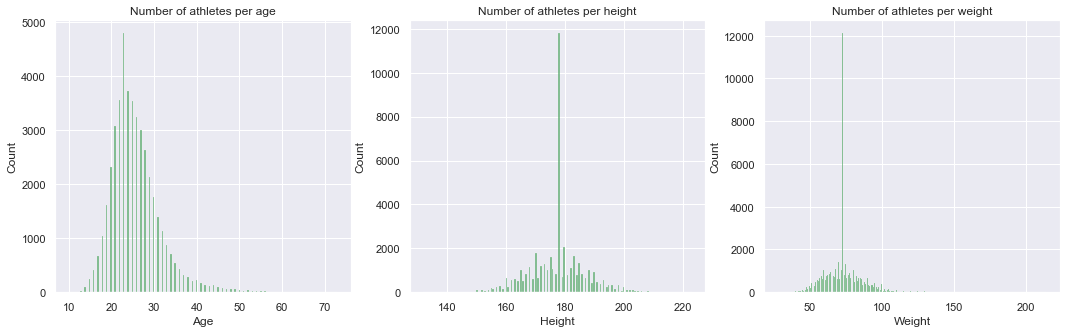

In [103]:
fig = plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
sns.histplot(x = 'Age', data = df, color = 'g')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of athletes per age')

plt.subplot(1, 3, 2)
sns.histplot(x = 'Height', data = df, color = 'g')
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Number of athletes per height')

plt.subplot(1, 3, 3)
sns.histplot(x = 'Weight', data = df, color = 'g')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Number of athletes per weight')

plt.show()

Percebemos, portanto, que os dados substituídos geraram certa distorção nos gráficos, devido à exagerada ocorrência de valores específicos em cada coluna, mas mantiveram o formato geral da curva.

## Análises e gráficos

Depois da limpeza do dataset, os dados estão prontos para serem analisados! Vamos pensar em algumas análises e construir gráficos para tirar conclusões sobre as informações que temos à disposição.

#### Idade por ano

Podemos avaliar como a distribuição de idades dos atletas variou ao longo dos anos, usando o tipo de gráfico boxplot disponibilizado pelo seaborn.

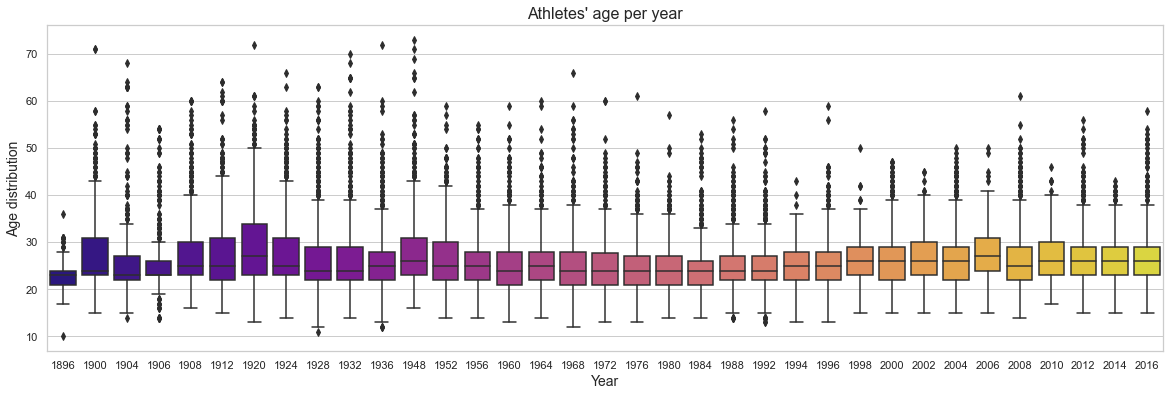

In [104]:
# Criando um boxplot, com os anos no eixo x e idades no eixo y
fig = plt.figure(figsize = (20, 6))
sns.set_style("whitegrid")
sns.boxplot(x = 'Year', y = 'Age', data = df, palette = 'plasma')
plt.title("Athletes' age per year", fontdict = {'size': 16})
plt.xlabel('Year', fontdict = {'size':14})
plt.ylabel('Age distribution',fontdict = {'size':14})
plt.show()

Dessa primeira análise, podemos perceber que a distribuição de idades permaneceu muito parecida ao longo dos anos, visto que a 'caixa' do gráfico, representativa do intervalo entre o primeiro e terceiro quartil, está quase sempre entre as linhas dos 20 e 30 anos. Além disso, a quantidade de outliers tem diminuído nas últimas edições, já que a participação de pessoas acima dos 60 e abaixo dos 15 anos foi reduzindo ao longo do tempo, seja pela mudança de modalidades ou pela não classificação dessas pessoas

#### Desempenho histórico do Brasil
Vamos traçar um gráfico que mostre a participação e o desempenho histórico do Brasil ao longo das Olimpíadas. No eixo x estarão representados os anos de edições dos Jogos, enquanto o eixo y representará a contagem de atletas participantes. No histograma, as cores das barras mostrarão se o atleta teve alguma medalha e, se sim, qual delas conseguiu conquistar.

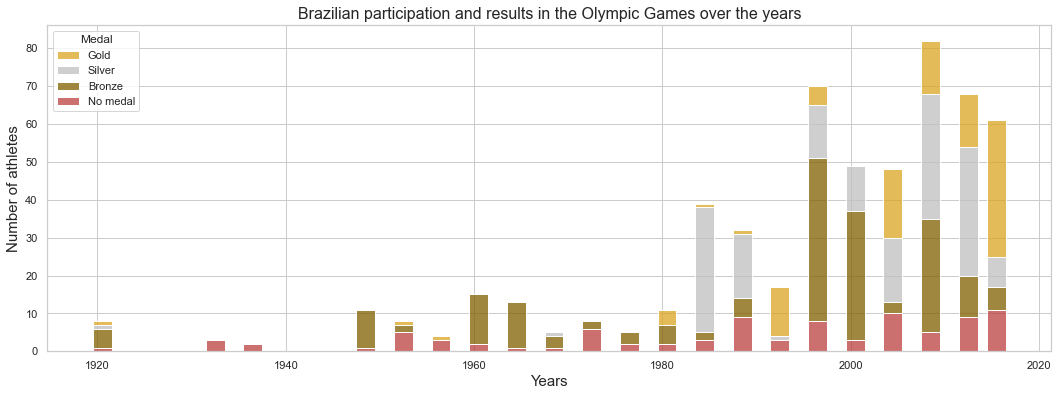

In [105]:
# Cria um dataframe auxiliar somente com dados dos atletas brasileiros
df_aux = df.loc[df['NOC'] == 'BRA']

cores = ['goldenrod', 'silver', '#7f5f00', '#bb3f3f']
ordem_cores = ['Gold', 'Silver', 'Bronze', 'No medal']

plt.figure(figsize = (18,6))
sns.histplot(data = df_aux, x = 'Year', 
                hue = 'Medal', hue_order = ordem_cores, palette = cores, 
                multiple = 'stack', binwidth = 1, shrink = 2)
plt.xlabel('Years', fontdict = {'size': 15})
plt.ylabel('Number of athletes', fontdict = {'size': 15})
plt.title('Brazilian participation and results in the Olympic Games over the years', fontdict = {'size': 16})
plt.show()

É claro que as informações dispostas no gráfico não estão completamente fiéis à realidade, pois o dataset trabalhado não possui literalmente todos os atletas que já competiram em Olimpíadas. Mesmo assim, é uma ótima forma de visualizar a proporção dos dados, ou seja, o crescimento da participação e das medalhas brasileiras é um fenômeno real, que começou a ocorrer no final do século XX e foi muito impulsionado pelos Jogos de 2008, sediados em Londres.

Seria interessante, também, descobrir quais esportes renderam mais medalhas ao Brasil...

In [106]:
# Cria um dataframe com os medalhistas brasileiros
df_MedBR = df[(df.Medal != 'No medal') & (df.NOC == 'BRA')]
# Agrupa as medalhas por cada esporte
Sports_br = df_MedBR.groupby('Sport')['Medal'].count()

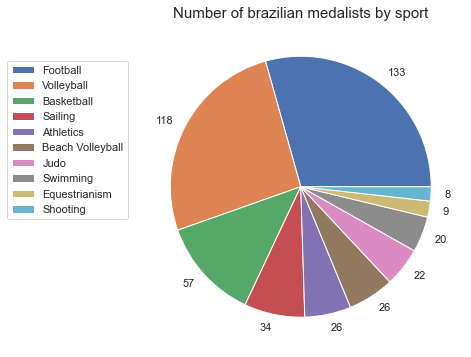

In [107]:
# Vamos fazer um gráfico de pizza com os 10 esportes que renderam mais medalhas ao Brasil
Sports_br = Sports_br.sort_values(ascending = False).head(10)

plt.figure(figsize = (12,6))
plt.pie(Sports_br, labels = Sports_br)
plt.legend(Sports_br.index, loc = (-0.4, 0.4))
plt.title('Number of brazilian medalists by sport', fontdict = {'size': 15})
plt.show()


Vemos, então, que futebol, volei e basquete são os três esportes com mais medalhas brasileiras. Esse resultado não é uma surpresa, pois esses são esportes coletivos e o dataset está organizado por atleta, não por conquista de pódio. Mesmo assim, é muito interessante perceber a quantidade de medalhas em modalidades como hipismo, atletismo, tiro e vela, que não são esportes muito populares em meio ao público brasileiro.

Já que estamos falando de valorização no esporte, seria bem relevante procurar entender se a proporção de atletas do sexo feminino e masculino que conquistaram alguma medalha para o Brasil é equilibrada.

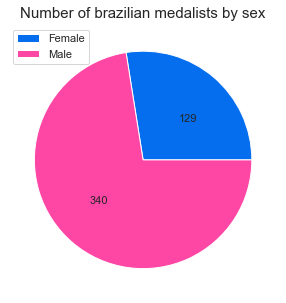

In [108]:
# A partir do dataframe de metalhistas br, agrupa as medalhas por sexo do atleta
MedalsPerSex_br = df_MedBR.groupby('Sex')['Medal'].count()

cores = ['#056eee', '#fe46a5']
plt.figure(figsize = (5,5))
plt.pie(MedalsPerSex_br, labels = MedalsPerSex_br, labeldistance = 0.5, colors = cores)
plt.legend(['Female', 'Male'])
plt.title('Number of brazilian medalists by sex', fontdict = {'size': 15})
plt.show()

Por esse gráfico de setores, conseguimos perceber que a quantidade de medalhistas do sexo feminino representa pouco mais de 25% de todos os medalhistas olímpicos brasileiros. Para fazer uma análise mais profunda, devemos levar em consideração que a participação feminina nos Jogos Olímpicos é bem mais baixa e muito recente.

#### Participação feminina X masculina

Vamos comparar a participação geral de atletas do sexo feminino e masculino ao longo dos anos a partir de um gráfico de barras.

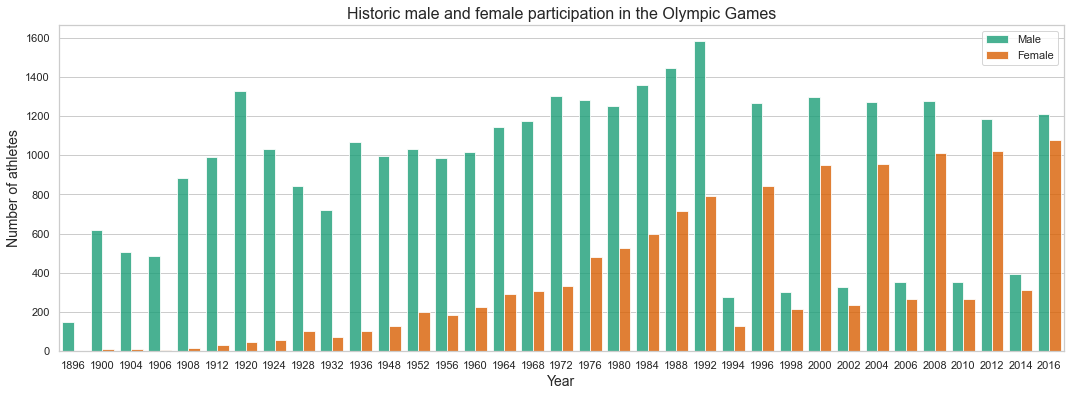

In [109]:
plt.figure(figsize = (18, 6))
sns.countplot(data = df, x = 'Year', 
               hue = 'Sex', palette = 'Dark2', alpha = 0.8, saturation = 1)
plt.legend(['Male', 'Female'])
plt.xlabel('Year', fontdict = {'size': 14})
plt.ylabel('Number of athletes', fontdict = {'size': 14})
plt.title('Historic male and female participation in the Olympic Games', fontdict = {'size': 16})
plt.show()

Aqui, conseguimos perceber como a entrada de mulheres nos Jogos Olímpicos é um fenômeno recente. Embora a participação feminina continue aumentando, a proporção entre atletas dos sexos masculino e feminino ainda não alcançou a igualdade em nenhuma edição.

Por esse gráfico é possível notar também, a grande diferença de dimensão entre os Jogos de Inverno e de Verão, visto que a participação nos Jogos de inverno não chega nem a 50% dos atletas dos jogos de verão, que envolvem mais pessoas, medalhas, modalidades, etc.

Podemos terminar nossa análise sobre medalhistas brasileiros mas, agora, considerando somente as edições de Olimpíadas a partir da qual ocorreu a primeira medalha feminina. Vamos plotar o gráfico e compará-lo com o anterior

In [110]:
# Descobrir qual foi o ano da primeira medalha brasileira conquistada por uma atleta do sexo feminino
df_MedBR[df.Sex == 'F'].sort_values('Year').head(1)

C:\Users\maria\AppData\Local\Temp/ipykernel_60084/160459371.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_MedBR[df.Sex == 'F'].sort_values('Year').head(1)


,Athlete_ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
34782,105049,Adriana Ramos Samuel,F,30.0,178.0,65.0,BRA,1996 Summer,1996,Summer,Atlanta,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Silver


C:\Users\maria\AppData\Local\Temp/ipykernel_60084/1900597310.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MedalsPerSex1996 = df_MedBR[df.Year >= 1996]


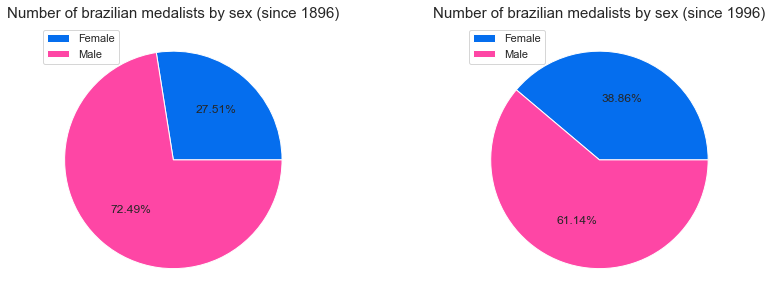

In [111]:
# Dataframe já utilizado anteriormente, com dados desde os primeiros Jogos Olímpicos
MedalsPerSex_br = df_MedBR.groupby('Sex')['Medal'].count()
# Dataframe que considera a partir de 1996
MedalsPerSex1996 = df_MedBR[df.Year >= 1996]
MedalsPerSex1996 = MedalsPerSex1996.groupby('Sex')['Medal'].count()

fig = plt.figure(figsize = (14, 5))
cores = ['#056eee', '#fe46a5']

plt.subplot(1, 2, 1)
plt.pie(MedalsPerSex_br, colors = cores, autopct='%1.2f%%')
plt.legend(['Female', 'Male'])
plt.title('Number of brazilian medalists by sex (since 1896)', fontdict = {'size': 15})

plt.subplot(1, 2, 2)
plt.pie(MedalsPerSex1996, colors = cores, autopct='%1.2f%%')
plt.legend(['Female', 'Male'], loc = 'upper left')
plt.title('Number of brazilian medalists by sex (since 1996)', fontdict = {'size': 15})

plt.show()

Agora conseguimos concluir que a primeira medalha feminina brasileira só foi conquistada 100 anos após a primeira edição dos Jogos Olímpicos modernos. A partir dela, um pouco menos de 2/5 das medalhas brasileiras foram conquistadas por atletas do sexo feminino, podendo parte desse desequilíbrio ser explicado pela participação ainda desigual entre os sexos.

#### Hipóteses sobre alto desempenho

Será que existe um padrão entre os medalhistas de ouro? Qual é o tipo físico mais comum entre os atletas de alto desempenho? Vamos montar um scatterplot que tente responder essas perguntas:

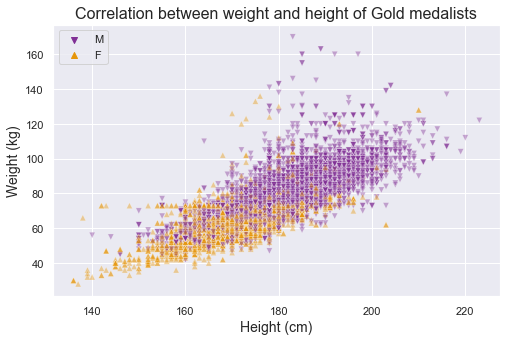

In [112]:
# Cria um dataframe selecionando todos os medalhistas de Ouro
df_ouro = df[df.Medal == 'Gold']

sns.set_style('darkgrid')
plt.figure(figsize = (8,5))
sns.scatterplot(data = df_ouro, x = 'Height', y = 'Weight',
                    hue = 'Sex', palette = 'CMRmap', alpha = 0.4,
                    style = 'Sex', markers = ['v', '^'])
plt.xlabel('Height (cm)', fontdict = {'size': 14})
plt.ylabel('Weight (kg)', fontdict = {'size': 14})
plt.legend( loc = 'upper left')
plt.title('Correlation between weight and height of Gold medalists', fontdict = {'size': 16})

plt.show()

Através do gráfico de dispersão construído, não é possível definir um único padrão de 'tipo físico' evidente entre os medalhistas de ouro, principalmente devido às particularidades de cada atleta e de cada modalidade. Mesmo assim, podemos perceber que os dados estão concentrados em uma região da malha do gráfico, através da qual poderia ser traçada uma reta que aproxima as relações mais comuns entre peso e altura. Como esperado intuitivamente, essas duas grandezas mantêm certa relação de proporção, visto que pessoas mais altas tendem a ser também mais pesadas. 

Por fim, uma observação importante a ser tirada desse gráfico é a existência de linhas verticais e horizontais em que há grande concentração de dados e que foram formadas na etapa de limpeza de dados, quando substituímos os dados faltantes pelas medianas 73 kg e 178cm.